[View in Colaboratory](https://colab.research.google.com/github/redpanda-ai/epi_python/blob/master/kaggle_two_sigma_follow_along.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


drive/My Drive/colab/train.h5
drive/My Drive/colab/train.h5.zip
drive/My Drive/colab/red_panda_banner.png

Let's look at the image:


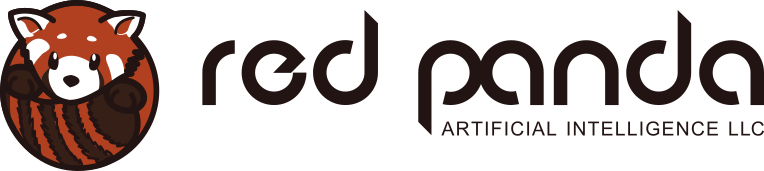

In [2]:
import glob
path = 'drive/My Drive/colab/'

def list_files(path):
  """This function just lists files in a directory path"""
  my_files = glob.glob(f"{path}*")
  for file in my_files:
    print(file)

# 1. Call a function to list all files in the directory path    
list_files(path)    
# 2. Load an image file with PIL Image and see it rendered in the notebook
from PIL import Image
print("\nLet's look at the image:")
x=Image.open(f"{path}red_panda_banner.png")

# 3.  Display the image, red_panda_banner.png, as a test to ensure that we have
# loaded the file from the mounted drive
x

### The naive approach

If we predict that the next value of $ y $ is the same as the last value, then:

> $ \hat{y}_{t + 1} =  y_{t} $


### The average

### The moving average
> Use a window, and average only the ***window***

>>1.  Better than the simple average
>>2.  The size of the window matters

### Single exponential smoothing
> Attach larger weights to more recent events
> Similar to the ***discount factor***

### Holt's linear trend method

> Takes the idea of a ***trend*** into account
>> Forecast equation, exponential smoothing using the level and the trend
>>> Level equation
>>> Trend equation

### Holt's Winter seasonal method

>  forecast
>>  level
>>  trend
>>  seasonal

### Multivariate Time Series
> Similar but finds linear interdependencies between multiple variables
> Each variable has a regression like equation, where it is regressed against its own lagged values and the lagged values of other variables
> Examples include ARIMA, ARIMAX, etc.
> Or treat it like a supervised problem and use the sequential power of LSTM networks



In [3]:
#1 - List the dataset
!ls -Falh "/content/drive/My Drive/colab/train.h5"

#!wget "https://www.youtube.com/redirect?v=P1lgTATSVYA&event=video_description&redir_token=lwaoA4qKxHJfoKOfpUXh9ySjaGF8MTUzODYxNzM1NkAxNTM4NTMwOTU2&q=https%3A%2F%2Fwww.kaggle.com%2Fc%2Ftwo-sigma-financial-modeling%2Fdownloads%2Ftrain.h5.zip"
#!curl -O -J -L "https://www.kaggle.com/c/two-sigma-financial-modeling/downloads/train.h5.zip"

#!cat train.h5.zip

-rw------- 1 root root 731M Oct  4 05:08 '/content/drive/My Drive/colab/train.h5'


In [4]:
#2 - Convert data to pandas dataframe
!pip install --upgrade tables

import pandas as pd

with pd.HDFStore("/content/drive/My Drive/colab/train.h5", "r") as train:
  df = train.get("train")

    100% |████████████████████████████████| 3.8MB 7.0MB/s 
    100% |████████████████████████████████| 163kB 12.2MB/s 


In [5]:
#3 - how big is our dataset
len(df)

1710756

In [6]:
#4 - examine the dataset
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [7]:
#5 - how many labels and values do we have

labels = []
values = []

for col in df.columns:
  labels.append(col)
  values.append(df[col].isnull().sum())
  print(col, values[-1])

id 0
timestamp 0
derived_0 72959
derived_1 81029
derived_2 398651
derived_3 149471
derived_4 406458
fundamental_0 23947
fundamental_1 679070
fundamental_2 368840
fundamental_3 454380
fundamental_5 962020
fundamental_6 701625
fundamental_7 26340
fundamental_8 373166
fundamental_9 565567
fundamental_10 112977
fundamental_11 368840
fundamental_12 110871
fundamental_13 355138
fundamental_14 356084
fundamental_15 354897
fundamental_16 355138
fundamental_17 97222
fundamental_18 15833
fundamental_19 54588
fundamental_20 110871
fundamental_21 54333
fundamental_22 558488
fundamental_23 356723
fundamental_24 576655
fundamental_25 121894
fundamental_26 657184
fundamental_27 281298
fundamental_28 667331
fundamental_29 354106
fundamental_30 354907
fundamental_31 454380
fundamental_32 111672
fundamental_33 13835
fundamental_34 434862
fundamental_35 424476
fundamental_36 15843
fundamental_37 355843
fundamental_38 803489
fundamental_39 377574
fundamental_40 279702
fundamental_41 30115
fundamental_42 2

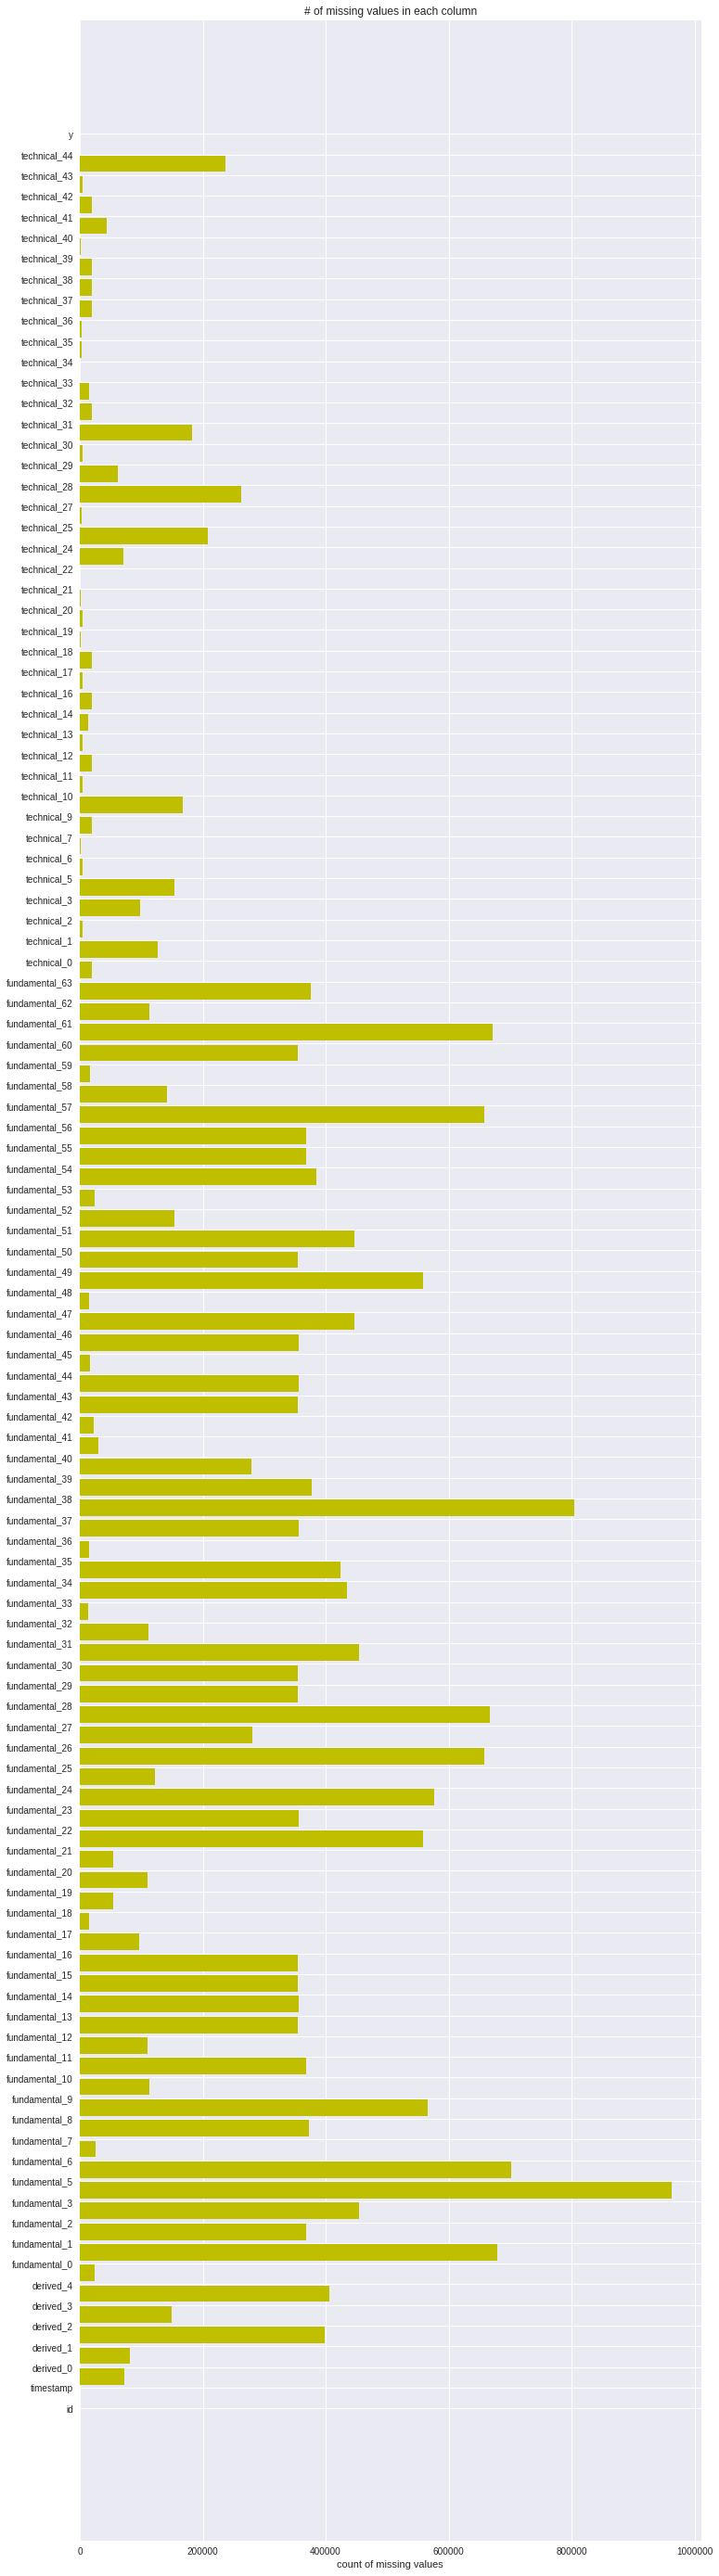

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 50))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+(width)/2.)
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("count of missing values")
ax.set_title("# of missing values in each column")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


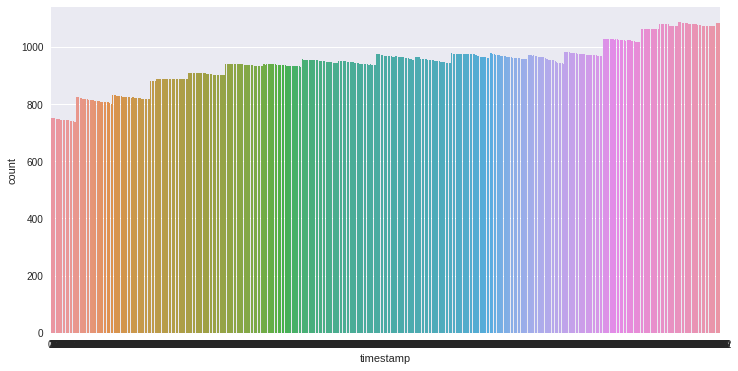

In [9]:
#7 - counts for each timestep in the data
import seaborn as sns

fig = plt.figure(figsize=(12, 6))
sns.countplot(x='timestamp', data=df)
plt.show()

In [10]:
#8 - Unique assets
print(len(df.id.unique()))

1424


In [0]:
"""
Taken directly from:
https://www.kaggle.com/slothouber/kagglegym-emulation
Author: Frans Slothouber
"""

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score


def r_score(y_true, y_pred, sample_weight=None, multioutput=None):
    r2 = r2_score(y_true, y_pred, sample_weight=sample_weight,
                  multioutput=multioutput)
    r = (np.sign(r2)*np.sqrt(np.abs(r2)))
    if r <= -1:
        return -1
    else:
        return r


class Observation(object):
    def __init__(self, train, target, features):
        self.train = train
        self.target = target
        self.features = features


class Environment(object):
    def __init__(self):
        with pd.HDFStore("/content/drive/My Drive/colab/train.h5", "r") as hfdata:
            self.timestamp = 0
            fullset = hfdata.get("train")
            self.unique_timestamp = fullset["timestamp"].unique()
            # Get a list of unique timestamps
            # use the first half for training and
            # the second half for the test set
            n = len(self.unique_timestamp)
            i = int(n/2)
            timesplit = self.unique_timestamp[i]
            self.n = n
            self.unique_idx = i
            self.train = fullset[fullset.timestamp < timesplit]
            self.test = fullset[fullset.timestamp >= timesplit]

            # Needed to compute final score
            self.full = self.test.loc[:, ['timestamp', 'y']]
            self.full['y_hat'] = 0.0
            self.temp_test_y = None

    def reset(self):
        timesplit = self.unique_timestamp[self.unique_idx]

        self.unique_idx = int(self.n / 2)
        self.unique_idx += 1
        subset = self.test[self.test.timestamp == timesplit]

        # reset index to conform to how kagglegym works
        target = subset.loc[:, ['id', 'y']].reset_index(drop=True)
        self.temp_test_y = target['y']

        target.loc[:, 'y'] = 0.0  # set the prediction column to zero

        # changed bounds to 0:110 from 1:111 to mimic the behavior
        # of api for feature
        features = subset.iloc[:, :110].reset_index(drop=True)

        observation = Observation(self.train, target, features)
        return observation

    def step(self, target):
        timesplit = self.unique_timestamp[self.unique_idx-1]
        # Since full and target have a different index we need
        # to do a _values trick here to get the assignment working
        y_hat = target.loc[:, ['y']]
        self.full.loc[self.full.timestamp == timesplit, ['y_hat']] = y_hat._values

        if self.unique_idx == self.n:
            done = True
            observation = None
            reward = r_score(self.temp_test_y, target.loc[:, 'y'])
            score = r_score(self.full['y'], self.full['y_hat'])
            info = {'public_score': score}
        else:
            reward = r_score(self.temp_test_y, target.loc[:, 'y'])
            done = False
            info = {}
            timesplit = self.unique_timestamp[self.unique_idx]
            self.unique_idx += 1
            subset = self.test[self.test.timestamp == timesplit]

            # reset index to conform to how kagglegym works
            target = subset.loc[:, ['id', 'y']].reset_index(drop=True)
            self.temp_test_y = target['y']

            # set the prediction column to zero
            target.loc[:, 'y'] = 0

            # column bound change on the subset
            # reset index to conform to how kagglegym works
            features = subset.iloc[:, 0:110].reset_index(drop=True)

            observation = Observation(self.train, target, features)

        return observation, reward, done, info

    def __str__(self):
        return "Environment()"


def make():
    return Environment()

In [0]:
#9 Agent environment loop
def make():
  return Environment()

def test():
  env = make()
  observation = env.reset()
  
  print(len(observation.target))
  print(len(observation.train))
  
  n = 0
  
  rewards = []
  
  while True:
    target = observation.target
    target.loc[:,'y'] = 0.0006
    observation, reward, done, info = env.step(target)
    if done:
      break
    rewards.append(reward)
    n = n + 1
    
  print(info)
  print(n)
  print(rewards[0:15])
  
  

In [16]:
#10 test it
test()

968
806298
{'public_score': -0.017829389044606993}
906
[-0.15367924219682547, -0.026140842058380256, -0.11231466648997339, -0.1682864647754967, -0.02167206673334583, -0.08693960274478746, -0.30473984896980755, -0.09382985372389648, -0.09945405540987054, -0.05014964521079367, -0.14505984849997253, -0.19402383221313182, -0.0017121406664662242, -0.01388272905431911, -0.2019392220527433]
